In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#There's 11,145 players in this dataset
nba_df = pd.read_csv('/Users/ronniesimmons/Downloads/all_seasons.csv')
nba_df.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


In [139]:
nba_df.columns
nba_df.isnull().any()
nba_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11145 entries, 0 to 11144
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_name        11145 non-null  object 
 1   team_abbreviation  11145 non-null  object 
 2   age                11145 non-null  float64
 3   player_height      11145 non-null  float64
 4   player_weight      11145 non-null  float64
 5   college            11145 non-null  object 
 6   country            11145 non-null  object 
 7   draft_year         11145 non-null  object 
 8   draft_round        11145 non-null  object 
 9   draft_number       11145 non-null  object 
 10  gp                 11145 non-null  int64  
 11  pts                11145 non-null  float64
 12  reb                11145 non-null  float64
 13  ast                11145 non-null  float64
 14  net_rating         11145 non-null  float64
 15  oreb_pct           11145 non-null  float64
 16  dreb_pct           111

In [96]:
# covid = nba_df[nba_df['season'] == '2019-20']
# covid['age'].value_counts()

In [8]:
#Unnamed is an irrelevant column 
nba_df.drop(columns= ['Unnamed: 0'], inplace = True)

In [92]:
#Round the heights to two decimal places
nba_df['player_weight'] = nba_df['player_weight'].apply(lambda x: round(x,2))

In [138]:
nba_df.describe()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000
mean,27.168686,200.812818,100.637601,52.005832,8.126487,3.560036,1.801463,-2.153899,0.055593,0.141772,0.185599,0.508099,0.131078
std,4.344164,9.190973,12.576417,25.069495,5.935482,2.495394,1.789940,12.150611,0.043889,0.063194,0.053047,0.098879,0.095017
min,18.000000,160.020000,60.330000,1.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,195.580000,90.720000,32.000000,3.500000,1.800000,0.600000,-6.300000,0.022000,0.096000,0.150000,0.478000,0.065000
50%,27.000000,200.660000,99.790000,58.000000,6.600000,3.000000,1.200000,-1.300000,0.043000,0.132000,0.182000,0.521000,0.102000
75%,30.000000,208.280000,109.320000,74.000000,11.500000,4.700000,2.400000,3.200000,0.086000,0.182000,0.218000,0.557000,0.178000
max,44.000000,231.140000,163.290000,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


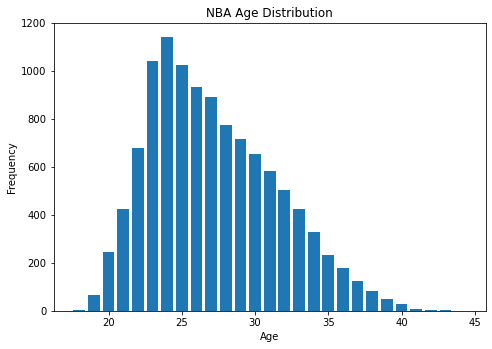

In [135]:
#Were not alot of older players in the league
#The mode seems to be 24 years old
ages = dict(nba_df['age'].value_counts())
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ages.keys(),ages.values())
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('NBA Age Distribution')
plt.show()

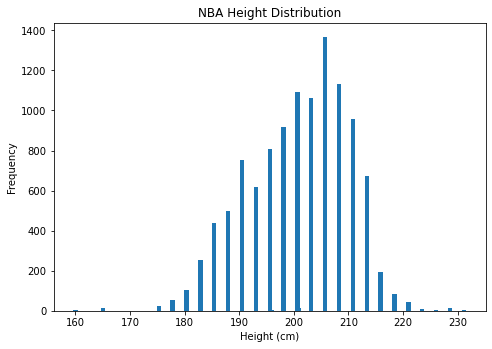

In [99]:
heights = dict(nba_df['player_height'].value_counts())
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(heights.keys(),heights.values())
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.title('NBA Height Distribution')
plt.show()

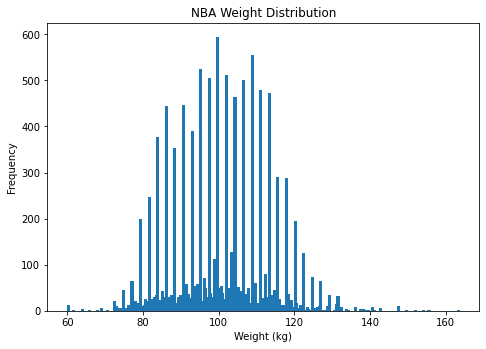

In [100]:
weights = dict(nba_df['player_weight'].value_counts())
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(weights.keys(),weights.values())
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.title('NBA Weight Distribution')
plt.show()

Text(0.5, 1.0, 'Age vs Rating')

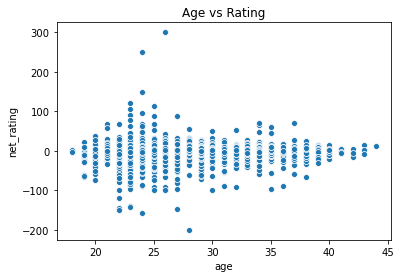

In [115]:
sns.scatterplot(x= nba_df['age'], y= nba_df['net_rating'])
plt.title('Age vs Rating')

Text(0.5, 1.0, 'Games Played vs Rating')

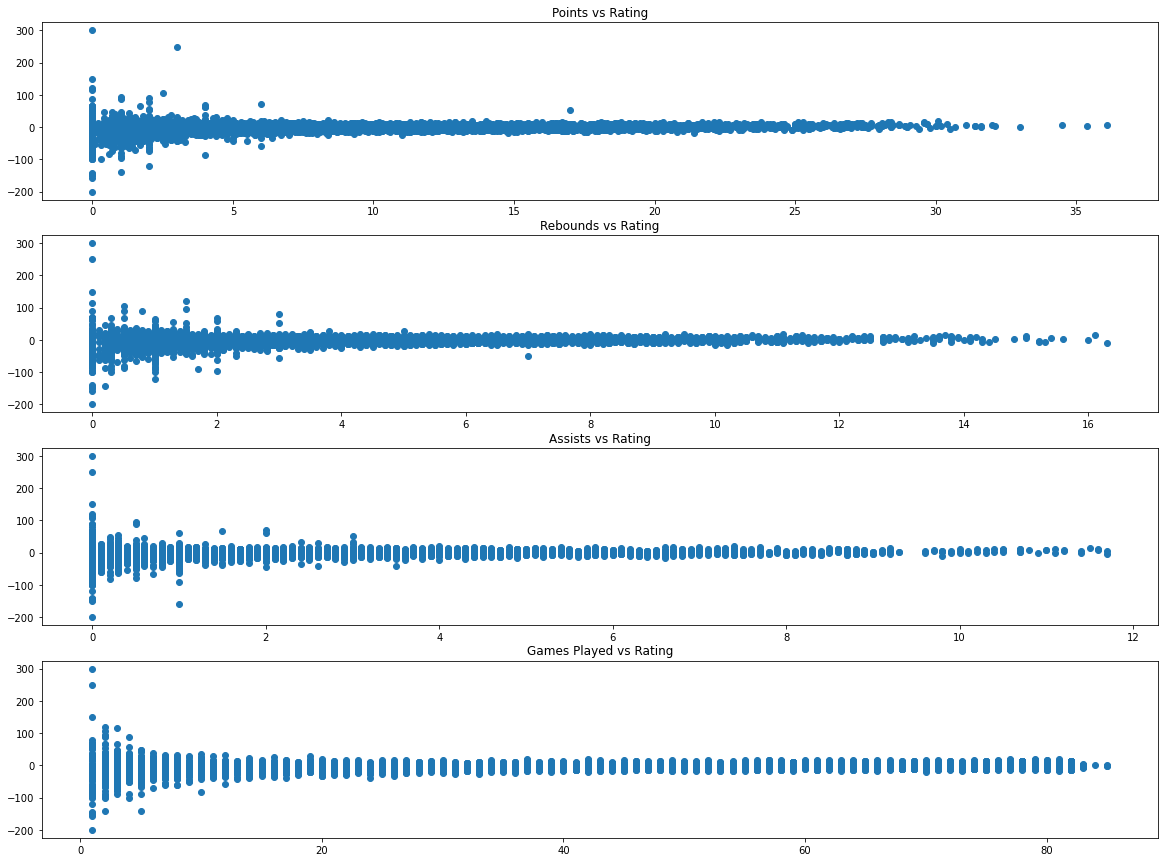

In [122]:
fig, (ax2, ax3, ax4, ax5) = plt.subplots(4,figsize= (20,15))
ax2.scatter(nba_df['pts'], nba_df['net_rating'])
ax3.scatter(nba_df['reb'], nba_df['net_rating'])
ax4.scatter(nba_df['ast'], nba_df['net_rating'])
ax5.scatter(nba_df['gp'], nba_df['net_rating'])
ax2.set_title("Points vs Rating")
ax3.set_title("Rebounds vs Rating")
ax4.set_title("Assists vs Rating")
ax5.set_title("Games Played vs Rating")

In [151]:
nba_df.corr()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
age,1.000000,-0.013981,0.046906,0.046221,-0.000810,0.028319,0.083695,0.088161,-0.064672,0.012451,-0.133839,0.025627,0.063037
player_height,-0.013981,1.000000,0.829897,-0.005844,-0.059748,0.422547,-0.463908,-0.009260,0.589033,0.614650,-0.110438,0.069810,-0.632000
player_weight,0.046906,0.829897,1.000000,0.009313,-0.032127,0.436760,-0.395353,-0.000507,0.603256,0.606327,-0.074489,0.060415,-0.547485
gp,0.046221,-0.005844,0.009313,1.000000,0.543846,0.471562,0.388840,0.251260,-0.021649,0.060702,0.138119,0.389950,0.134544
pts,-0.000810,-0.059748,-0.032127,0.543846,1.000000,0.623909,0.652098,0.217883,-0.121267,0.048110,0.633110,0.382417,0.322214
reb,0.028319,0.422547,0.436760,0.471562,0.623909,1.000000,0.224217,0.190416,0.411597,0.606899,0.221804,0.314563,-0.087725
ast,0.083695,-0.463908,-0.395353,0.388840,0.652098,0.224217,1.000000,0.165236,-0.349217,-0.215141,0.378803,0.180234,0.802008
net_rating,0.088161,-0.009260,-0.000507,0.251260,0.217883,0.190416,0.165236,1.000000,0.056177,0.036148,-0.004305,0.309536,0.060158
oreb_pct,-0.064672,0.589033,0.603256,-0.021649,-0.121267,0.411597,-0.349217,0.056177,1.000000,0.552462,-0.102698,0.066285,-0.443269
dreb_pct,0.012451,0.614650,0.606327,0.060702,0.048110,0.606899,-0.215141,0.036148,0.552462,1.000000,-0.028883,0.098745,-0.346278


In [148]:
nba_df.corr()['net_rating']

age              0.088161
player_height   -0.009260
player_weight   -0.000507
gp               0.251260
pts              0.217883
reb              0.190416
ast              0.165236
net_rating       1.000000
oreb_pct         0.056177
dreb_pct         0.036148
usg_pct         -0.004305
ts_pct           0.309536
ast_pct          0.060158
Name: net_rating, dtype: float64

Text(0.5, 1.0, 'TS PCT vs Rating')

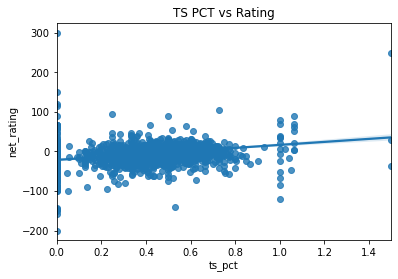

In [150]:
sns.regplot(x = nba_df['ts_pct'], y = nba_df['net_rating'])
plt.title('TS PCT vs Rating')